In [1]:
from somu import SOM
from minisom import MiniSom
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
import seaborn as sns

# sns.set_theme(style="whitegrid", font_scale=1.2, palette="muted")
# plt.rcParams["figure.figsize"] = [20, 6]
# plt.rcParams["axes.labelsize"] = 0

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set_theme(style="whitegrid", font_scale=1.2, palette="muted")
plt.rcParams["figure.figsize"] = [10, 10]  # Adjust default figure size for clarity


def plot_map(data_points, grid, centroids):
    closest_neighbors = {}
    for i, point in enumerate(grid):
        distances = np.linalg.norm(grid - point, axis=1)
        distances[i] = np.inf  # Ignore self
        closest_neighbors[i] = np.argsort(distances)[:4]  # Get 4 closest neighbors

    # Improved plot
    plt.figure(figsize=(12, 12))
    plt.scatter(
        data_points[:, 0],
        data_points[:, 1],
        s=15,
        alpha=0.6,
    )

    for i, neighbors in closest_neighbors.items():
        for neighbor in neighbors:
            plt.plot(
                [centroids[i][0], centroids[neighbor][0]],
                [centroids[i][1], centroids[neighbor][1]],
                color="darkred",
                alpha=0.4,
                linewidth=0.8,
            )

    # Enhancing plot appearance
    plt.grid(color="gray", linestyle="--", linewidth=0.5, alpha=0.7)
    plt.tight_layout()
    plt.show()


# Example usage
# Assuming data_points, grid, and centroids are NumPy arrays.

In [3]:
# Generate the dataset
data_uniform = np.random.uniform(-2000, 2000, (1000000, 2))
blob, _ = make_blobs(
    n_samples=1000,
    centers=3,
    n_features=2,
    center_box=(-1500, 1500),
    cluster_std=200.0,
    random_state=42,
)
data_points = np.vstack([data_uniform, blob])

def viz(units, som_size = [15, 15]):
    subset_indices = np.random.choice(data_points.shape[0], 1000, replace=False)
    subset_points = data_points[subset_indices]

    # Plot the SOM grid
    plt.figure(figsize=(8, 8))
    plt.scatter(subset_points[:, 0], subset_points[:, 1], s=10, c='blue', alpha=0.5, label="Data Points")

    # Draw the SOM nodes as a grid
    for i in range(som_size[0]):
        for j in range(som_size[1]):
            node_weights = units[i, j]
            plt.scatter(node_weights[0], node_weights[1], c='red', marker='s', s=30)  # SOM nodes
            if i > 0:
                plt.plot([units[i, j, 0], units[i - 1, j, 0]],
                        [units[i, j, 1], units[i - 1, j, 1]], c='gray', lw=0.5)
            if j > 0:
                plt.plot([units[i, j, 0], units[i, j - 1, 0]],
                        [units[i, j, 1], units[i, j - 1, 1]], c='gray', lw=0.5)

    plt.title("Self-Organizing Map (SOM) Grid Overlay")
    plt.legend()
    plt.show()

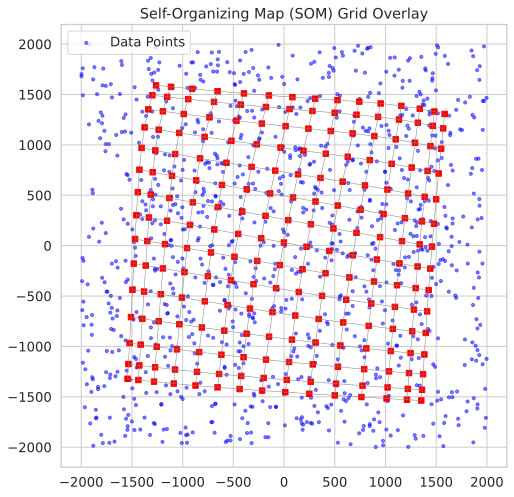

CPU times: user 23.2 s, sys: 9.59 s, total: 32.7 s
Wall time: 7.33 s


In [8]:
%%time
som_rust = SOM([15, 15]).fit(data_points, sigma_initial=5.0, epochs=10, verbose=False)
units = som_rust.centroids.reshape((15, 15, 2))
viz(units)

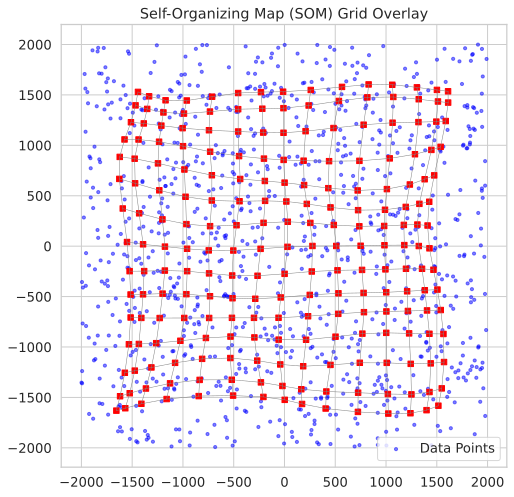

CPU times: user 30.6 s, sys: 378 ms, total: 31 s
Wall time: 30.7 s


In [10]:
%%time
som = MiniSom(15, 15, 2, sigma=5.0, learning_rate=0.5)
som.random_weights_init(data_points)
som.train_random(data_points, len(data_points))
som.weights = som.get_weights()
viz(som.weights)